<a href="https://colab.research.google.com/github/williambrunos/Data-Visualization/blob/main/Class%202/Class%202.1/Quantitative_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative Visualization

On this class, we are going to learn how to handle with quantitative variables, which represents numbers, using **seaborn** and **matplotlib**. This kind of variable is important to understand classes of data, for example.


## Horizontal and Vertical Bars Graphic

We know that we can't apply mathmatical functions into categoric variables, but we can apply a quantitative value for those, which represents groups. On this class, we will see how to visualize quantitative data with bard graphic and how to desing it to represent better our insights.

### Bars Graphic with Matplotlib

A bar graphic is the most used tool to represent quantitative values according to groups. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline # all the images generated by matplotlib and seaborn will be on the notebook, not creating a new tab

It's very simple to create a bar graphic using matplotlib. For this, we are going to use the ``plt.bar(categories, quantities)`` function, recieving from arguments the categories of the data and the respectives quantities that are going to be shown for each categorie.

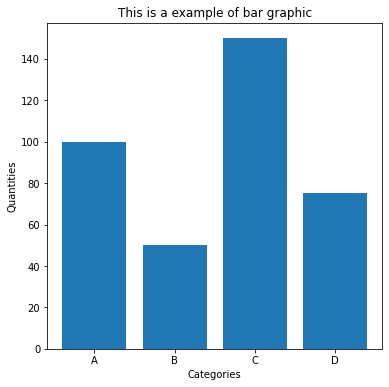

In [13]:
categories = ['A', 'B', 'C', 'D']
quantities = [100, 50, 150, 75]

plt.figure(figsize=(6, 6)) # These values are calculated as "inches", yikes, as (width, height)
plt.xlabel('Categories')
plt.ylabel('Quantities')
plt.title('This is a example of bar graphic')
plt.bar(categories, quantities)
plt.show()

<BarContainer object of 4 artists>

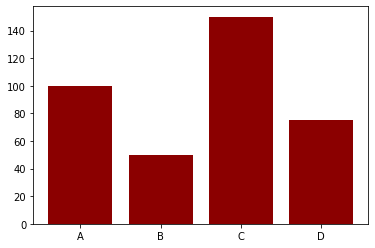

In [16]:
plt.bar(categories, quantities, color="darkred")

As an exercise to practice the data visualization concepts learnt, we are going to develop a data visualization case with the data set in this URI 

[Movies DataSet](https://raw.githubusercontent.com/emanueles/datavis-course/master/assets/files/observable/movies.json)

In [34]:
df = pd.read_json('https://raw.githubusercontent.com/emanueles/datavis-course/master/assets/files/observable/movies.json')
df.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


Notice that the data has 5 attributes, which 3 of then are quantitative: Worlwide_Gross_M and Budget_M, and other 2 qualitatives (categorics), which are: Film, Year and Genre.

Yes, Year is a qualitative variable, because it does not represent a number by itself, but a categorie (launch year) of the movie.

In [35]:
df.describe()

,Year,Worldwide_Gross_M,Budget_M
count,30.000000,30.000000,30.000000
mean,2009.100000,889.133333,168.933333
std,1.422722,397.207818,54.591861
min,2007.000000,621.000000,50.000000
25%,2008.000000,696.000000,146.250000
50%,2009.000000,793.000000,162.500000
75%,2010.000000,951.250000,200.000000
max,2011.000000,2784.000000,300.000000


One thing to note here is that pandas used the describe method for all the quantitative variables, including the year of the movie, even though the year being a qualitative variable, it is represented by numbers on the data frame.

Those insights does not concern for qualitative variables. Supose that we want to know the answer for some questions: how much movies were made by category? How much on each year? What genders had more gross? And what had more budget?

There questions are answered using bar graphics.

In [56]:
df_counted_by_genre = df.groupby("Genre").count()
df_counted_by_genre['Film']

Genre
Action       13
Adventure     4
Animation     8
Drama         2
Fantasy       1
Romance       1
Thriller      1
Name: Film, dtype: int64

<BarContainer object of 7 artists>

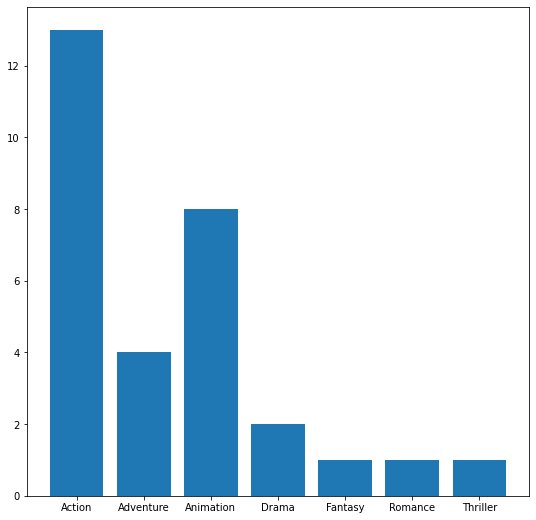

In [60]:
plt.figure(figsize=(9, 9))
plt.bar(df_counted_by_genre.index, df_counted_by_genre['Film'])

From that graphic, we can see that the movies distribution is not equally distributed. This happens because this is just a sample of data.

### Bar Graphic with Seaborn

Seaborn is a data visualization library built on top of matplotlib, with dome advantages. Seaborn is based on data frames with multiple variables.

Wha does it means? It means that seaborn can make a lot of visualizations using just functions, without the need of manipulating the data frame like we did above.

For example, the function used to do a bar graphic with the goal of being a count graphic is ``countplot(column, data)`` function.

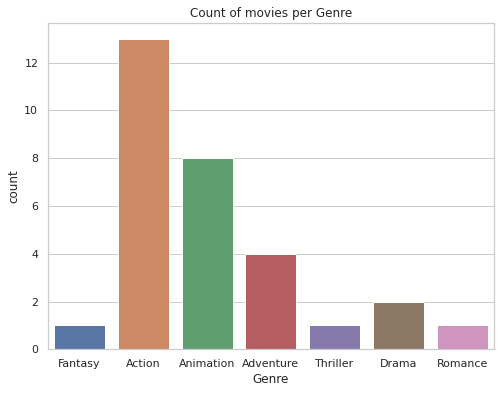

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.title('Count of movies per Genre')
plt.ylabel('Counts')
plt.xlabel('Genres')
sns.countplot(x='Genre', data=df)

For creating vertical graphics with seaborn, we have to set the x value. For creating horizontal graphics, we have to set the y value.

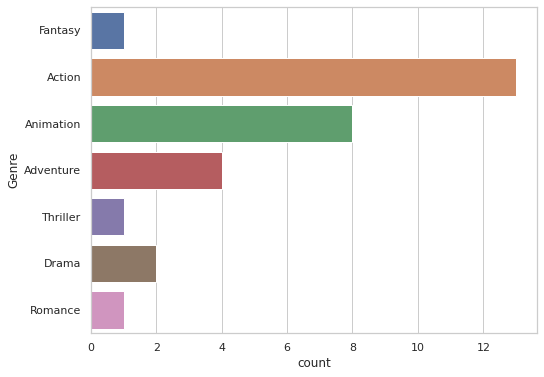

In [76]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.xlabel('Genres')
plt.ylabel('Counts')
sns.countplot(y='Genre', data=df)
plt.show()

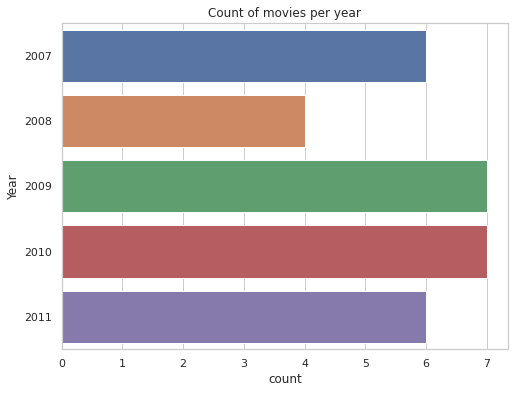

In [82]:
plt.figure(figsize=(8, 6))
plt.title('Count of movies per year')
plt.ylabel('Count')
plt.xlabel('Year')
sns.countplot(y='Year', data=df)
plt.show()

In [83]:
sns.barplot?

``sns.barplot`` will plot a bar graphic with the **mean (by default)** of each quantitative value per group. It includes a quantitative attribute called "confidance interval" and is used to map mean values on y of certain groups on x.

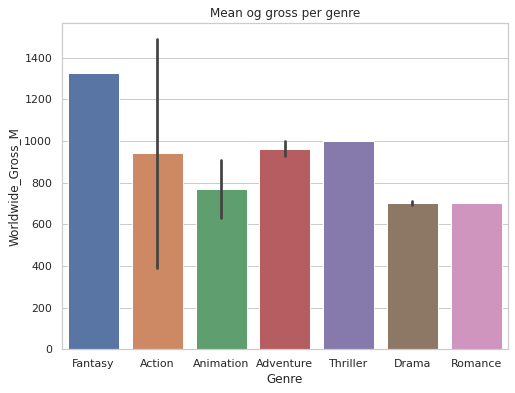

In [88]:
plt.figure(figsize=(8, 6))
plt.title('Mean og gross per genre')
plt.xlabel('Genre')
plt.ylabel('WorldWide Gross (M)')
sns.barplot(x='Genre', y='Worldwide_Gross_M', ci='sd', data=df);

And if we want to change the estimator of the bar plot? What should we do? Simple, change the ``estimator`` attribute on the boxplot function.

For example, if instead of knowing the mean of Gross for each Genre of movie we wanted to know the sum of all the world wide gross (M) for each group:

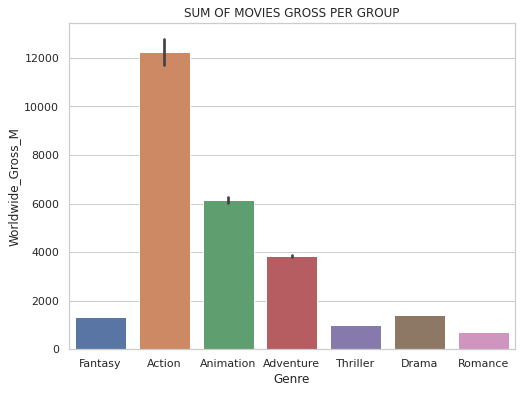

In [94]:
plt.figure(figsize=(8, 6))
plt.title('SUM OF MOVIES GROSS PER GROUP')
plt.xlabel('Genres')
plt.ylabel('SUM OF WORLD WIDE GROSS (M)')
sns.barplot(x='Genre', y='Worldwide_Gross_M', ci='sd', estimator=sum, data=df)
plt.show()